# Flow shop variants

This notebook shows how to use PyJobShop to solve the flow shop problem and its no-wait and blocking variants.

The flow shop problem (FSP) is a classical scheduling problem where each job must be processed first on the first machine, then on the second machine, and so on. The objective is to minimize the makespan. 

In [1]:
import random

from pyjobshop import Model, plot

num_jobs = 6
num_machines = 3
processing_times = [
    [random.randint(1, 50) for _ in range(num_machines)]
    for _ in range(num_jobs)
]

## Regular flow shop

162.0


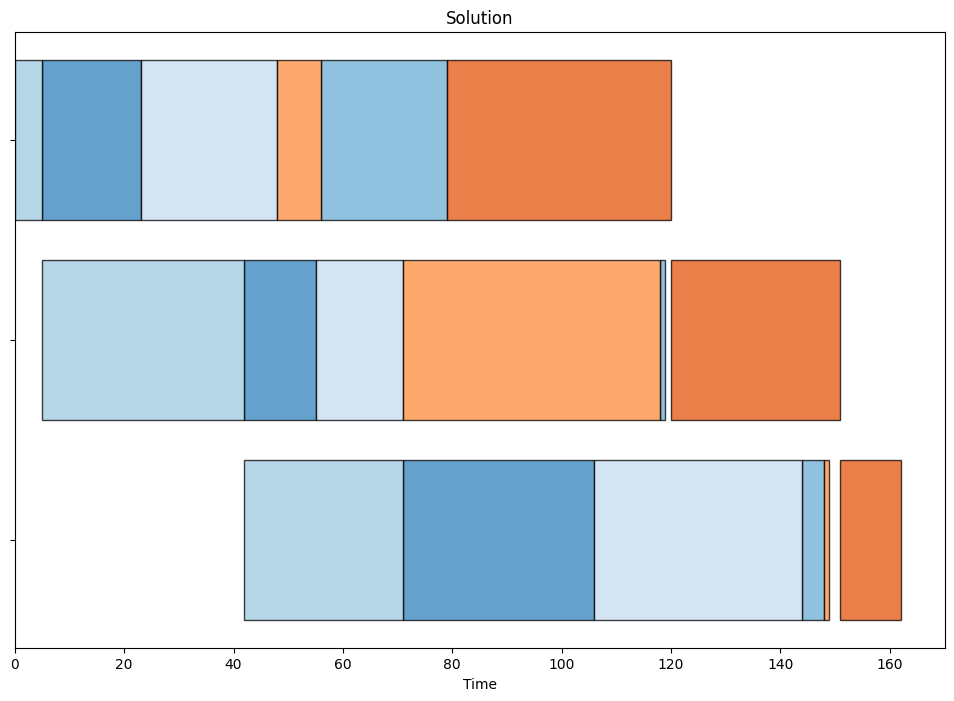

In [2]:
model = Model()
jobs = [model.add_job() for _ in range(num_jobs)]
machines = [model.add_machine() for _ in range(num_machines)]

for job_idx, job in enumerate(jobs):
    tasks = [model.add_task(job=job) for _ in range(num_machines)]

    for machine_idx, task in enumerate(tasks):
        duration = processing_times[job_idx][machine_idx]
        model.add_processing_time(task, machines[machine_idx], duration)

    for idx in range(num_machines - 1):
        model.add_end_before_start(tasks[idx], tasks[idx + 1])

result = model.solve(display=False, time_limit=10)
print(result.objective)
plot(model.data(), result.best)

### No-wait flow shop

171.0
SolveStatus.OPTIMAL


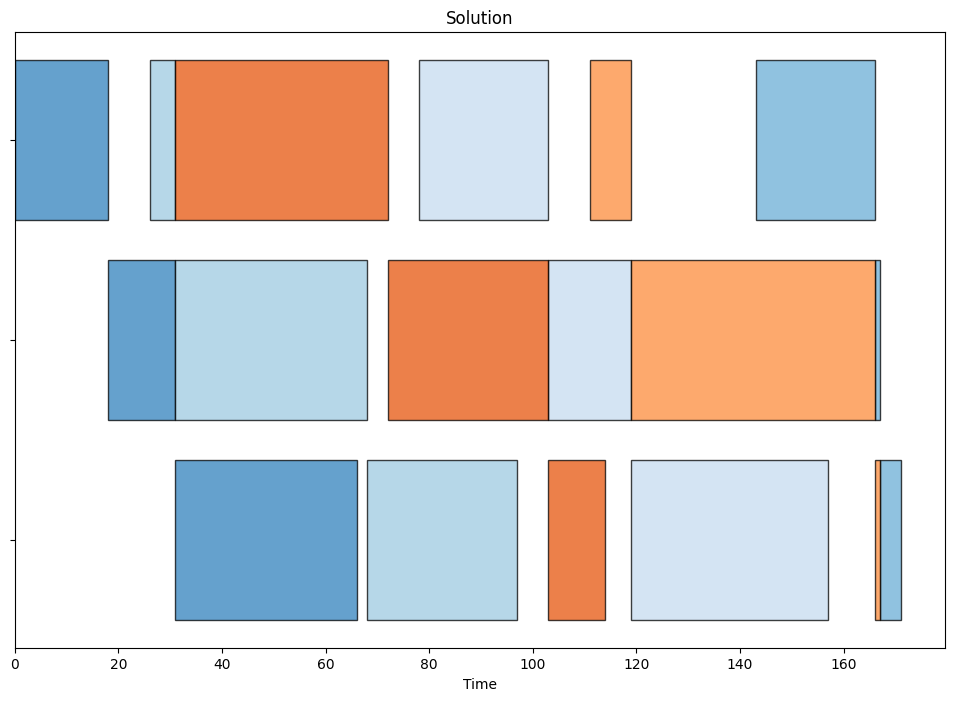

In [3]:
random.seed(42)

model = Model()

jobs = [model.add_job() for _ in range(num_jobs)]
machines = [model.add_machine() for _ in range(num_machines)]

for job_idx, job in enumerate(jobs):
    tasks = [model.add_task(job=job) for _ in range(num_machines)]

    for machine_idx, task in enumerate(tasks):
        duration = processing_times[job_idx][machine_idx]
        model.add_processing_time(task, machines[machine_idx], duration)

    for idx in range(num_machines - 1):
        model.add_end_at_start(tasks[idx], tasks[idx + 1])

result = model.solve(display=False, time_limit=10)
print(result.objective)
print(result.status)
plot(model.data(), result.best)

### Blocking flow shop

What if we want to have blocking? We can do that by keeping the same constraints, but set the `fixed_duration` to `False` for the task. By default, all tasks have a fixed duration (determined by their processing mode), but in blocking flow shops we can have tasks with variable durations as they depend on whether the machine is blocking or not.

171.0
SolveStatus.OPTIMAL


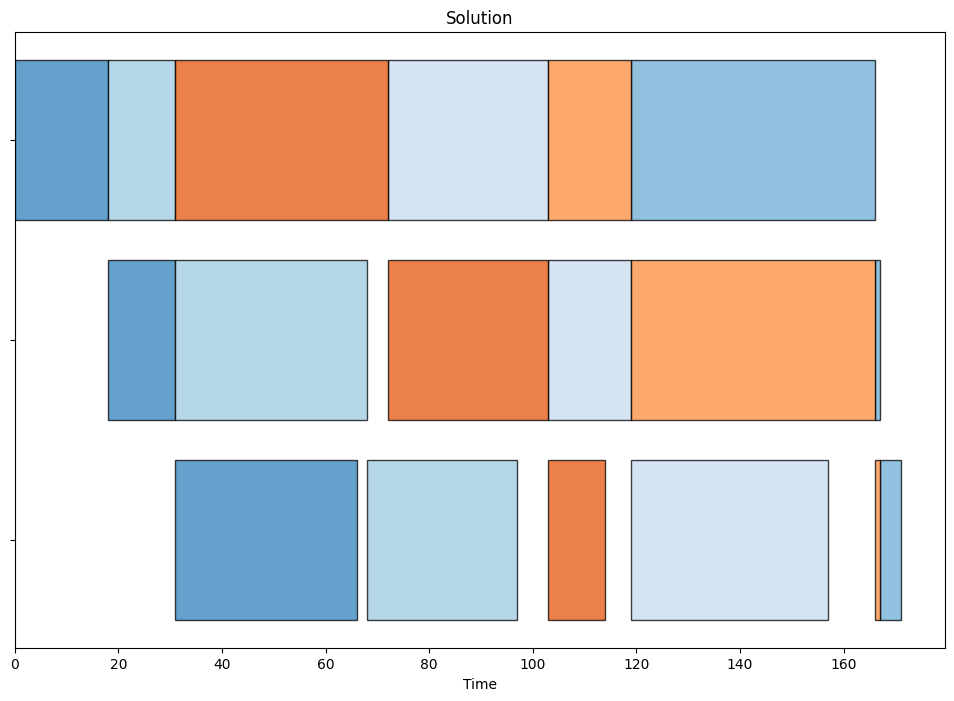

In [4]:
random.seed(42)

model = Model()

jobs = [model.add_job() for _ in range(num_jobs)]
machines = [model.add_machine() for _ in range(num_machines)]

for job_idx, job in enumerate(jobs):
    # Tasks no longer have fixed durations because of potential blocking times.
    tasks = [
        model.add_task(job=job, fixed_duration=False)
        for _ in range(num_machines)
    ]

    for machine_idx, task in enumerate(tasks):
        duration = processing_times[job_idx][machine_idx]
        model.add_processing_time(task, machines[machine_idx], duration)

    for idx in range(num_machines - 1):
        model.add_end_at_start(tasks[idx], tasks[idx + 1])

result = model.solve(display=False, time_limit=10)
print(result.objective)
print(result.status)
plot(model.data(), result.best)

As expected, the blocking variants of the flow shop scheduling problem has a lower makespan than the no-wait variant: all no-wait solutions are a solution to the blocking variant, but not vice versa.

# Conclusion


- No wait
- Blocking
- The classic permutation flow shop is not supported by PyJobShop.  See [OR-Tools](https://github.com/google/or-tools/blob/main/examples/contrib/permutation_flow_shop.py) and [CP Optimizer](https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/cp/visu/flow_shop_permutation.py).